# Анализ сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

# Описание данных и план работы

<font size=4> Описание данных: </font>

**Пользователи — `users_go.csv`**

- `user_id`	— уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` —	возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

**Поeздки — `rides_go.csv`**

- `user_id`	— уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

**Подписки — `subscriptions_go.csv`**

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

<font size=4> План работы: </font>

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения

##  Загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [ ]:
data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
data_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

### Датасет с пользователями

In [ ]:
# Настройка для вывода всех столбцов
pd.set_option('display.max_columns', 20)

In [ ]:
data_users.info()
data_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<font size=3> Выводы по датасету: </font>

Датасет состоит из 5 столбцов, пропущенных данных нет. Два типа данных: `int64` и `object`

### Датасет с поездками

In [ ]:
data_rides.info()
data_rides.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Построим гистограммы для `distance` и `duration`.

<font size=3> Выводы по датасету: </font>

- Датасет состоит из 4 столбцов, пропуски в данных отсутствуют.
- Типы данных: `int64`, `float64`. В столбце `date` тип данных - `object`.

### **Датасет с подписками**

In [ ]:
data_subs.info()
data_subs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<font size=3> Выводы по датасету: </font>

В датасете 4 столбца и 2 строки, данные по подписках `free` и `ultra`

## Предобработка данных

### Обработка пропущенных значений

Выведем количество пропусков в каждом столбце во всех датасетах.

**<font size=3> Датасет с пользователями: </font>**

In [ ]:
print('Количество пропущенных значений в каждом столбце:')
data_users.isna().sum()

Количество пропущенных значений в каждом столбце:


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

**<font size=3> Датасет с поездками: </font>**

In [ ]:
print('Количество пропущенных значений в каждом столбце:')
data_rides.isna().sum()

Количество пропущенных значений в каждом столбце:


user_id     0
distance    0
duration    0
date        0
dtype: int64

**<font size=3> Датасет с подписками: </font>**

In [ ]:
print('Количество пропущенных значений в каждом столбце:')
data_subs.isna().sum()

Количество пропущенных значений в каждом столбце:


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Изменение типа данных и обработка дубликатов

В столбце `date` данные имеют тип `object`. Поменяем на тип `datetime64`.

In [ ]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

Проверим сколько дубликатов имеются в датасете `data_users` и `data_rides`, затем устраним их.

In [ ]:
print('Количество дубликатов до обработки:', data_users.duplicated().sum())
data_users.drop_duplicates(inplace=True)
print('Количество дубликатов после обработки:', data_users.duplicated().sum())

Количество дубликатов до обработки: 31
Количество дубликатов после обработки: 0


In [ ]:
print('Количество дубликатов до обработки:', data_rides.duplicated().sum())

Количество дубликатов до обработки: 0


### Добавление нового столбца

Согласно ТЗ, добавим новый столбец с номерами месяцев, но перед этим проверим какие года представлены:

In [ ]:
data_rides['date'].dt.year.unique()

array([2021], dtype=int32)

Данные предоставлены только за 2021 год

In [ ]:
data_rides['month'] = data_rides['date'].dt.month
data_rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int32

<font size=3> Вывод: </font>

1. Пропущенных значений в данных не было;
2. Дубликаты удалены;
3. Новый столбец `month` с номерами месяцев добавлен.

## Исследовательский анализ данных

### Визуализация частоты встречаемости городов

Визуализируем с помощью круговой диаграммы:

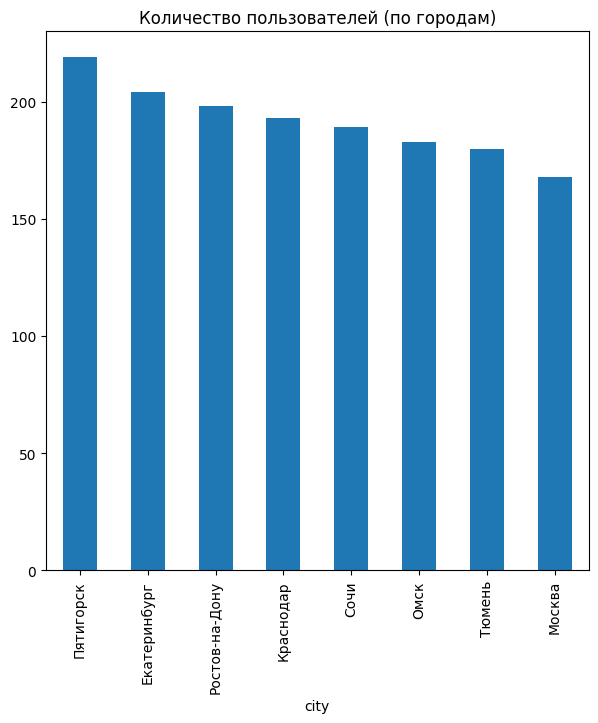

In [ ]:
(data_users['city'].value_counts().plot(
    kind='bar',
    figsize=(7, 7),
    title='Количество пользователей (по городам)',
    ylabel='')
);

Как видим по диаграмме, в целом, процентное соотношение пользователей по городам не сильно отличается.

### Соотношение пользователей с подписками

Также визуализируем с помощью круговой диаграммы

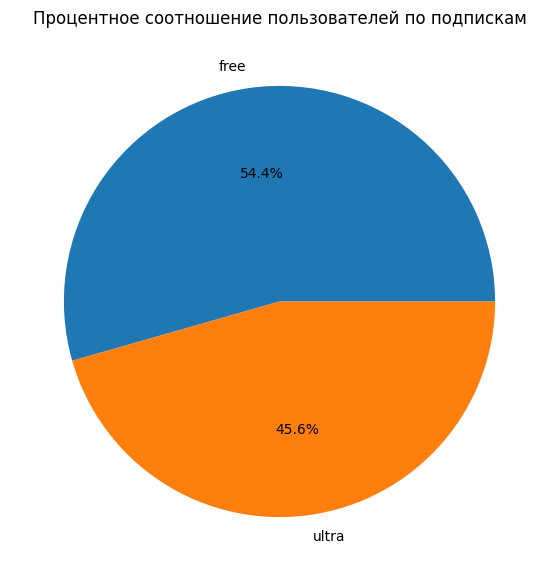

In [ ]:
(data_users['subscription_type'].value_counts().plot(
    kind='pie',
    figsize=(7, 7),
    autopct='%1.1f%%',
    title='Процентное соотношение пользователей по подпискам',
    ylabel='')
);

Пользователей с подпиской ultra чуть меньше половины

### Визуализация возраста пользователей

Возраст будем визуализировать с помощью гистограммы, так как она подходит для количественных величин.

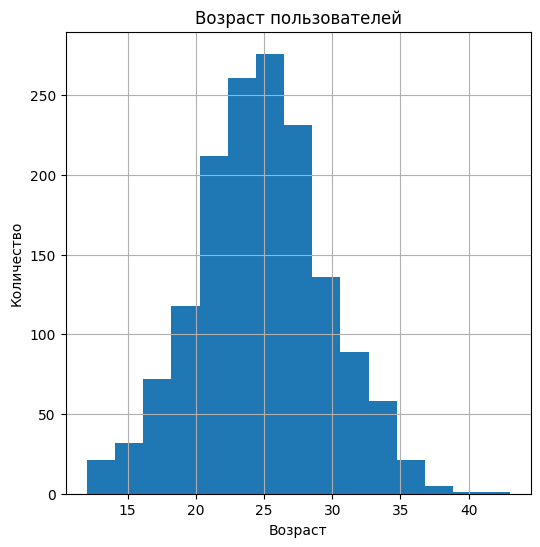

In [ ]:
(data_users['age'].plot(
      kind='hist',
      bins=15,
      figsize=(6, 6),
      grid=True,
      title='Возраст пользователей')
)
plt.xlabel('Возраст')
plt.ylabel('Количество');

Средний возраст пользователей - около 25 лет. Те, кто старше 35 и младше 15, встречаются реже.

Построим ящик с усами

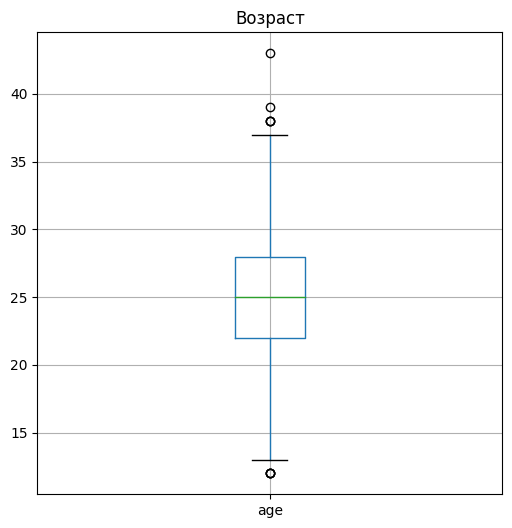

In [ ]:
data_users.boxplot('age', figsize=(6, 6))
plt.title('Возраст')
plt.show()

Выбросов малое количество

### Визуализация расстояния и длительности поездок

Визуализуем с помощью гистограмм

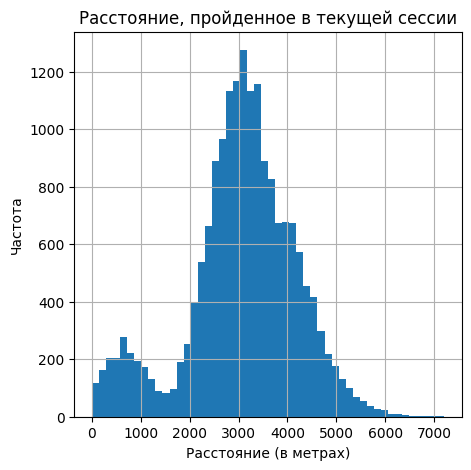

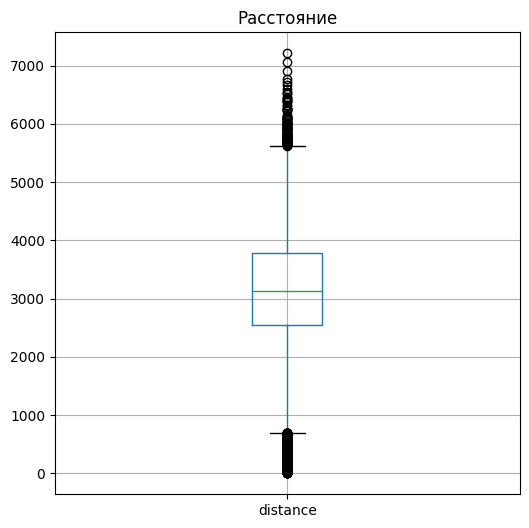

In [ ]:
(data_rides['distance'].plot(
    kind='hist',
    figsize=(5, 5),
    grid=True,
    bins=50,
    title='Расстояние, пройденное в текущей сессии')
)

plt.xlabel('Расстояние (в метрах)')
plt.ylabel('Частота')
plt.show()

data_rides.boxplot('distance', figsize=(6, 6))
plt.title('Расстояние')
plt.show()

Пик на графике "Расстояние, пройденное в текущей сессии" приходится на 3000 метров. Однако, можно заметить небольшой бугор в диапазоне значений 0-1200 метров.

Больше количество выбросов в диапазоне от 0 до 800 метров и выше 5600 метров

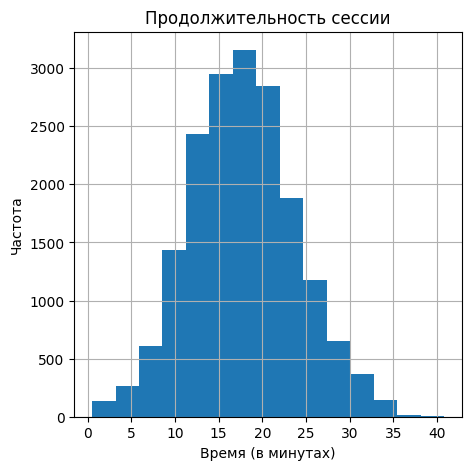

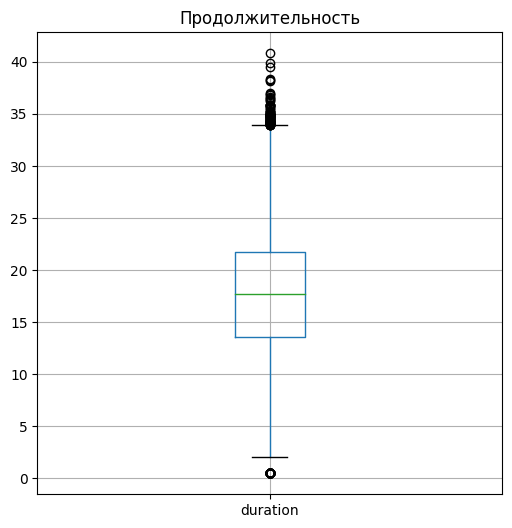

In [ ]:
(data_rides['duration'].plot(
    kind='hist',
    figsize=(5, 5),
    grid=True,
    bins=15,
    title='Продолжительность сессии')
)

plt.xlabel('Время (в минутах)')
plt.ylabel('Частота')
plt.show()

data_rides.boxplot('duration', figsize=(6, 6))
plt.title('Продолжительность')
plt.show()

На графике "Продолжительность сессии" пик приходится на 17-18 минут.

Выбросы начинаются в районе 34 минут

<font size=3> **Вывод:** </font>

1. Процентное соотношение городов практически одинаковое;
2. Количество пользователей с подпиской чуть меньше половины (45 %);
3. Средний возраст пользователей - около 25 лет. Те, кто старше 35 и младше 15, встречаются реже;
4. Расстояние и длительность каждой поездки распределены нормально;
5. По последним графикам видно, что у некоторых пользователей пройденное расстояние было возле нуля, как и продолжительность сессии.

## Объединение данных

### Объединение датафреймов

Узнаем размерности датафреймов и объединим данные из них в один - `data`

In [ ]:
print('Размер датасета "data_users"')
print('Количество строк, столбцов:', data_users.shape)
print()
print('Размер датасета "data_rides"')
print('Количество строк, столбцов:', data_rides.shape)
print()
print('Размер датасета "data_subs"')
print('Количество строк, столбцов:', data_subs.shape)

Размер датасета "data_users"
Количество строк, столбцов: (1534, 5)

Размер датасета "data_rides"
Количество строк, столбцов: (18068, 5)

Размер датасета "data_subs"
Количество строк, столбцов: (2, 4)


In [ ]:
data = data_users.merge(data_rides, on='user_id')

In [ ]:
data = data.merge(data_subs, on='subscription_type')

In [ ]:
print('Размер результирующего датафрейма "data"')
print('Количество строк, столбцов:', data.shape)

Размер результирующего датафрейма "data"
Количество строк, столбцов: (18068, 12)


Мы объединили датафреймы с помощью `merge` на общих столбцах c внутренним типом объединения.

In [ ]:
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Объединение получилось

### Создание датафреймов

Создадим два датафрейма на основе `data` с ключевой характеристикой - подпиской:

In [ ]:
data_free = data.query('subscription_type == "free"')
data_ultra = data.query('subscription_type == "ultra"')

### Визуализация информации

Построим диаграммы для этих датафреймов и сравним их.

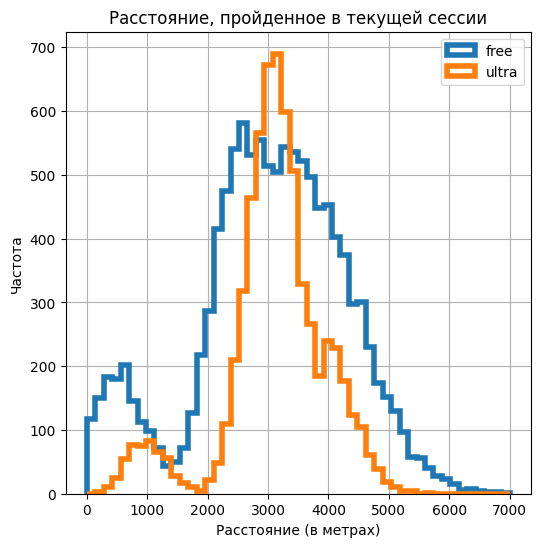

In [ ]:
(data_free['distance'].plot(
    kind='hist',
    figsize=(6, 6),
    grid=True,
    bins=50,
    title='Расстояние, пройденное в текущей сессии',
    histtype='step',
    linewidth=4,
    label='free',
    range=(0, 7000),
    legend=True)
)

(data_ultra['distance'].plot(
    kind='hist',
    figsize=(6, 6),
    grid=True,
    bins=50,
    histtype='step',
    linewidth=4,
    label='ultra',
    range=(0, 7000),
    legend=True)
)

plt.xlabel('Расстояние (в метрах)')
plt.ylabel('Частота')
plt.show()

По графику видно, что некоторые пользователи с подпиской `free` проезжали достаточно малое расстояние, скорее в виду цены за одну минуту поездки. Гистограмма `free` шире чем гистограмма `ultra`, что говорит о большем стандартном отклонении.

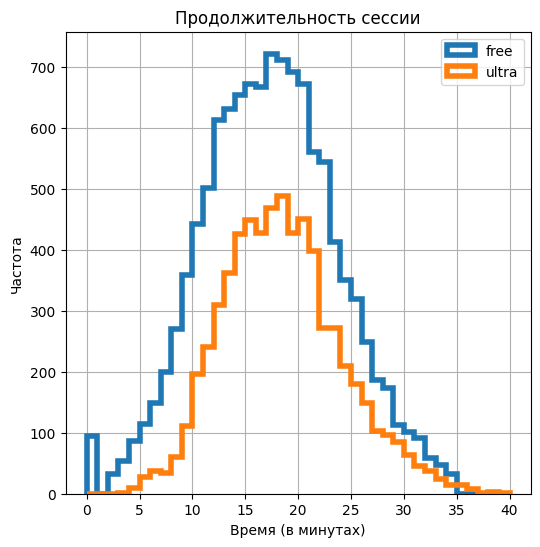

In [ ]:
(data_free['duration'].plot(
    kind='hist',
    figsize=(6, 6),
    grid=True,
    bins=40,
    title='Продолжительность сессии',
    histtype='step',
    linewidth=4,
    label='free',
    range=(0, 40),
    legend=True)
)
(data_ultra['duration'].plot(
    kind='hist',
    figsize=(6, 6),
    grid=True,
    bins=40,
    histtype='step',
    linewidth=4,
    label='ultra',
    range=(0, 40),
    legend=True)
)

plt.xlabel('Время (в минутах)')
plt.ylabel('Частота')
plt.show()

Здесь мы видим, что распределения похожи на нормальные, число пользователей с подпиской `free` много больше, чем изначально.

<font size=3> **Вывод:** </font>

Мы объединили данные из трех датафреймов в один - `data`.

Выделили два отдельных датафрейма на основе `data`:
- `data_free` - данные о пользователях без подписки;
- `data_ultra` - данные о пользователях с подпиской `ultra`.

Визуализировали информацию с помощью гистограмм.

В **бесплатном тарифе** в большинстве случаев пройденное расстояние лежит в диапазоне от 2 до 5 км, в **платном** - примерно от 2.5 до 4.5 км.

Что касается продолжительности сессии: в бесплатном тарифе в диапазоне 7-27 минут, в платном 10-30 минут.


## Подсчёт выручки

### Датафрейм с агрегированными данными

Продолжительность каждой поездки округлим в большую сторону с помощью `ceil`.

In [ ]:
data['duration'] = np.ceil(data['duration'])

Построим новый датафрейм с помощью сводной таблицы

In [ ]:
df = data.pivot_table(index=['user_id', 'month'],
                            values=['subscription_type', 'distance', 'duration', 'name'],
                            aggfunc={'subscription_type': max,
                                     'distance': sum,
                                     'duration': sum,
                                     'name': len})

Проверим `df` на пропуски

In [ ]:
df.isna().sum()

distance             0
duration             0
name                 0
subscription_type    0
dtype: int64

Пропусков нет

In [ ]:
df = df.rename(columns={'name': 'trips_number'})

In [ ]:
df.head(10)

distance  duration  trips_number subscription_type
user_id month                                                        
1       1       7027.511294      42.0             2             ultra
        4        754.159807       7.0             1             ultra
        8       6723.470560      46.0             2             ultra
        10      5809.911100      32.0             2             ultra
        11      7003.499363      56.0             3             ultra
        12      6751.629942      28.0             2             ultra
2       3      10187.723006      63.0             3             ultra
        4       6164.381824      40.0             2             ultra
        6       3255.338202      14.0             1             ultra
        7       6780.722964      48.0             2             ultra

In [ ]:
df.head(10)

distance  duration  trips_number subscription_type
user_id month                                                        
1       1       7027.511294      42.0             2             ultra
        4        754.159807       7.0             1             ultra
        8       6723.470560      46.0             2             ultra
        10      5809.911100      32.0             2             ultra
        11      7003.499363      56.0             3             ultra
        12      6751.629942      28.0             2             ultra
2       3      10187.723006      63.0             3             ultra
        4       6164.381824      40.0             2             ultra
        6       3255.338202      14.0             1             ultra
        7       6780.722964      48.0             2             ultra

### Добавление столбца

Создадим функцию, которая будет высчитывать выручку в зависимости от типа подписки:

In [ ]:
def profit(data):
    if data['subscription_type'] == 'free':
        return 50 * data['trips_number'] + 8 * data['duration']
    else:
        return 6 * data['duration'] + 199


Добавим новый столбец с выручкой с помощью `apply`. В ней укажем axis=1, то есть вычисление будет происходить по строкам

In [ ]:
df['revenue'] = df.apply(profit, axis=1)

In [ ]:
df.head(10)

distance  duration  trips_number subscription_type  revenue
user_id month                                                                 
1       1       7027.511294      42.0             2             ultra    451.0
        4        754.159807       7.0             1             ultra    241.0
        8       6723.470560      46.0             2             ultra    475.0
        10      5809.911100      32.0             2             ultra    391.0
        11      7003.499363      56.0             3             ultra    535.0
        12      6751.629942      28.0             2             ultra    367.0
2       3      10187.723006      63.0             3             ultra    577.0
        4       6164.381824      40.0             2             ultra    439.0
        6       3255.338202      14.0             1             ultra    283.0
        7       6780.722964      48.0             2             ultra    487.0

<font size=3> **Вывод:** </font>

Мы создали новый датафрейм с помощью сводной таблицы, куда добавили агрегированные данные, округлили продолжительность поездки с помощью `ceil` и добавили столбец `revenue` - данные о выручке с каждого пользователя в месяц

## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

Составим нулевую и альтернативную гипотезы:

H0: Пользователи с подпиской ultra тратят столько же времени на поездки, как и пользователи без подписки.

H1: Пользователи с подпиской ultra тратят больше времени на поездки, чем пользователи без подписки.

In [ ]:
alpha = 0.05 # ставим уровень статистической значимости 5 %

free_duration = data_free['duration']
ultra_duration = data_ultra['duration']

results = st.ttest_ind(ultra_duration, free_duration, alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


<font size=3> **Вывод:** </font>

Для проверки гипотезы мы использовали метод `ttest_ind`, который принимает две генеральные совокупности `ultra_duration` и `free_duration` и альтернативную гипотезу.

В итоге, нулевую гипотезу отвергаем - пользователи с подпиской тратят больше времени на поездки, чем без подписки.

### Среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров?

Формулируем нулевую и альтернативную гипотезы:

H0: Среднее расстояние, которое проезжают пользователи с подпиской, равно 3130 метров.

H1: Среднее расстояние больше 3130 метров.

In [ ]:
alpha = 0.05 # ставим уровень статистической значимости 5 %

ultra_distance = data_ultra['distance']
interested_value = 3130

results = st.ttest_1samp(ultra_distance, interested_value, alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


<font size=3> **Вывод:** </font>

Для проверки гипотезы мы использовали метод `ttest_1samp`, который принимает набор данных `ultra_distance`, предполагаемое среднее и альтернативную гипотезу.

В итоге, нулевую гипотезу отвергнуть не удалось - по всей видимости, пользователи с подпиской в среднем проезжают около 3130 метров

### Помесячная выручка от пользователей с подпиской по месяцам выше

Формулируем нулевую и альтернативную гипотезы:

H0: Помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без подписки.

H1: Помесячная выручка от пользователей с подпиской больше помесячной выручки пользователей без подписки

In [ ]:
alpha = 0.05 # ставим уровень статистической значимости 5 %

free_revenue = df.query('subscription_type == "free"')['revenue']
ultra_revenue = df.query('subscription_type == "ultra"')['revenue']

results = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


## Общий вывод

В шаге 1 мы сохранили три датасета в переменные `data_users`, `data_rides` и `data_subs`. Сделали небольшие выводы по каждому датасету.

В шаге 2 мы проверили данные на пропуски (их не оказалось), а также на дубликаты, после чего удалили их. Поменяли тип данных в столбце `date` и
добавили новый столбец `month` с номерами месяцев.

В шаге 3 провели исследовательский анализ данных:
- Процентное соотношение городов практически одинаковое;
- Количество пользователей с подпиской чуть меньше половины (45 %);
- Средний возраст пользователей - около 25 лет. Те, кто старше 35 и младше 15, встречаются реже;
- Расстояние и длительность каждой поездки распределены нормально;

В шаге 4 мы объединили данные из трех датафреймов в один - `data`.

Выделили два отдельных датафрейма на основе `data`:
- `data_free` - данные о пользователях без подписки;
- `data_ultra` - данные о пользователях с подпиской `ultra`.

Визуализировали информацию с помощью гистограмм.

В **бесплатном тарифе** в большинстве случаев пройденное расстояние лежит в диапазоне от 2 до 5 км, в **платном** - примерно от 2.5 до 4.5 км.

Что касается продолжительности сессии: в бесплатном тарифе в диапазоне **7-27** минут, в платном **10-30** минут.


В шаге 5 мы округлили продолжительность поездки с помощью `ceil`, создали новый датафрейм с помощью сводной таблицы, куда добавили агрегированные данные, добавили столбец `revenue` - данные о выручке с каждого пользователя в месяц

В шаге 6 проверили гипотезы:
- Пользователи с подпиской ultra тратят столько же времени на поездки, как и пользователи без подписки (*Нулевая гипотеза отвергнута в пользу альтернативной* - пользователи с подпиской тратят больше времени на поездки, чем без подписки);
- Среднее расстояние, которое проезжают пользователи с подпиской, равно 3130 метров (*Нулевую гипотезу не удалось отвергнуть*);
- Помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без подписки (*Нулевая гипотеза отвергнута в пользу альтернативной* - помесячная выручка от пользователей `ultra` больше);
- Ответили на теоретический вопрос.


В итоге, сервису аренды стоит акцентироваться на пользователях с подпиской, ведь они приносят большую выручку, тратят больше времени на поездки.

Так же стоит заметить, что пользователей из более "дорогих" городов (Москва и Сочи) меньше, хотя на самокатах передвигаться по ним более эффективно в виду пробок. Сервису стоит обратить внимание на это